## Menentukan Pertanyaan Bisnis

# Proyek Analisis Data: E-commerce Public Datasaet
- Nama: Ghina Tirta Wangi
- Email: ghinatirtawangi27@gmail.com
- Id Dicoding:ghinatirta

*   Pertanyaan 1: Berapa jumlah user Bike Sharing tahun 2011-2012?
*   Pertanyaan 2: Bagaimana trend penggunaan bike sharing berdasarkan musim dan cuaca?
*   Pertanyaan 3: Di hari (weekday/holiday/workingdays) apa user cenderung menggunakan Bike Sharing?
*   Pertanyaan 4: Pada pukul berapa user cenderung menggunakan Bike Sharing?



# Menyiapkan semua library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing data day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.duplicated().sum()

0

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing data hour_df

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
hour_df.duplicated().sum()

0

In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Cleaning Data day_df

In [16]:
day_df.rename(columns={"instant":"rec_id",
                       "dteday":"datetime",
                       "yr":"year",
                       "mnth":"month",
                       "weathersit":"weather_condition",
                       "hum":"humidity",
                       "casual":"unregistered",
                       "cnt":"total_user"},
              inplace=True)

In [17]:
day_df['datetime'] = pd.to_datetime(day_df.datetime)

In [18]:
cols = ['season' , 'year', 'month', 'holiday' , 'weekday' , 'workingday' , 'weather_condition']

for col in cols:
    day_df[col] = day_df[col].astype('category')

In [19]:
day_df.replace({'year':{0:2011, 1:2012}},inplace=True)

day_df.replace({'season':{1:'springer', 2:'summer', 3:'fall', 4:'winter'}},inplace=True)

day_df.replace({'weather_condition':{1:'Clear', 2:'Mist', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'}},inplace=True)

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  unregistered       731 non-null    int64         
 14  registered

In [21]:
day_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,unregistered,registered,total_user
0,1,2011-01-01,springer,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cleaning Data hour_df

In [22]:
hour_df.rename(columns={"instant":"rec_id",
                        "dteday":"datetime",
                        "yr":"year",
                        "mnth":"month",
                        "hr":"hour",
                        "weathersit":"weather_condition",
                        "casual":"unregistered",
                        "cnt":"total_user"},
              inplace=True)

In [23]:
hour_df['datetime'] = pd.to_datetime(day_df.datetime)

In [24]:
cols = ['season' , 'year', 'month', 'holiday' , 'weekday' , 'workingday' , 'weather_condition']

for col in cols:
    hour_df[col] = hour_df[col].astype('category')

In [25]:
hour_df.replace({'year':{0:2011, 1:2012}},inplace=True)

hour_df.replace({'season':{1:'springer', 2:'summer', 3:'fall', 4:'winter'}},inplace=True)

hour_df.replace({'weather_condition':{1:'Clear', 2:'Mist', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'}},inplace=True)

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  hum                17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  unregi

In [27]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,unregistered,registered,total_user
0,1,2011-01-01,springer,2011,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,springer,2011,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,springer,2011,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,springer,2011,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,springer,2011,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [28]:
day_df.groupby(by="year").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
})

,total_user,unregistered,registered
year,,,
2011,1243103,247252,995851
2012,2049576,372765,1676811


In [29]:
day_df.groupby(by="season").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
season,,,
fall,1061129,226091,835038
summer,918589,203522,715067
winter,841613,129782,711831
springer,471348,60622,410726


In [30]:
day_df.groupby(by="weather_condition").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
weather_condition,,,
Clear,2257952,446346,1811606
Mist,996858,169776,827082
Light Rain/Snow,37869,3895,33974


In [31]:
day_df.groupby(by="weekday").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
weekday,,,
5,487790,78238,409552
4,485395,61460,423935
6,477807,153852,323955
3,473048,57319,415729
2,469109,57843,411266
1,455503,70784,384719
0,444027,140521,303506


In [32]:
day_df.groupby(by="holiday").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
holiday,,,
0,3214244,597658,2616586
1,78435,22359,56076


In [33]:
day_df.groupby(by="workingday").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
workingday,,,
1,2292410,303285,1989125
0,1000269,316732,683537


### Exploratory Data Hour

In [34]:
hour_df.groupby(by="year").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
})

,total_user,unregistered,registered
year,,,
2011,1243103,247252,995851
2012,2049576,372765,1676811


In [35]:
hour_df.groupby(by="hour").agg({
    "total_user": "sum",
    "unregistered":"sum",
    "registered":"sum"
}).sort_values(by="total_user", ascending=False)

,total_user,unregistered,registered
hour,,,
17,336860,54220,282640
18,309772,44496,265276
8,261001,15761,245240
16,227748,53834,173914
19,226789,35505,191284
13,184919,52713,132206
12,184414,49718,134696
15,183149,54606,128543
14,175652,55089,120563


In [36]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="datetime",
    right_on="datetime"
)
all_df.head()

,rec_id_x,datetime,season_x,year_x,month_x,hour,holiday_x,weekday_x,workingday_x,weather_condition_x,...,weekday_y,workingday_y,weather_condition_y,temp_y,atemp_y,humidity,windspeed_y,unregistered_y,registered_y,total_user_y
0,1,2011-01-01,springer,2011,1,0,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,springer,2011,1,1,0,6,0,Clear,...,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,springer,2011,1,2,0,6,0,Clear,...,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,springer,2011,1,3,0,6,0,Clear,...,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,springer,2011,1,4,0,6,0,Clear,...,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rec_id_x             17379 non-null  int64         
 1   datetime             731 non-null    datetime64[ns]
 2   season_x             17379 non-null  category      
 3   year_x               17379 non-null  category      
 4   month_x              17379 non-null  category      
 5   hour                 17379 non-null  int64         
 6   holiday_x            17379 non-null  category      
 7   weekday_x            17379 non-null  category      
 8   workingday_x         17379 non-null  category      
 9   weather_condition_x  17379 non-null  category      
 10  temp_x               17379 non-null  float64       
 11  atemp_x              17379 non-null  float64       
 12  hum                  17379 non-null  float64       
 13  windspeed_x          17379 non-

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah user Bike Sharing tahun 2011-2012?

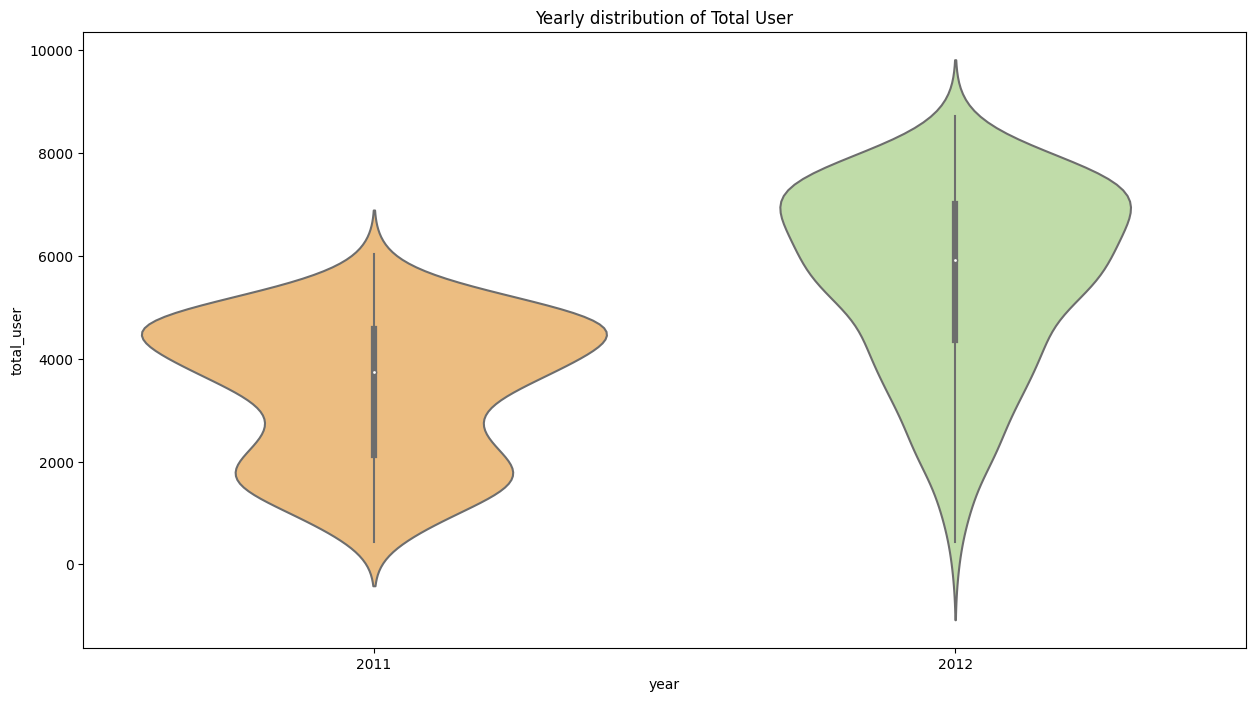

In [38]:
fig,ax=plt.subplots(figsize=(15,8))

sns.violinplot(x="year",y="total_user",data=day_df[["year","total_user"]], palette="Spectral", as_cmap=True)
ax.set_title("Yearly distribution of Total User")
plt.show()

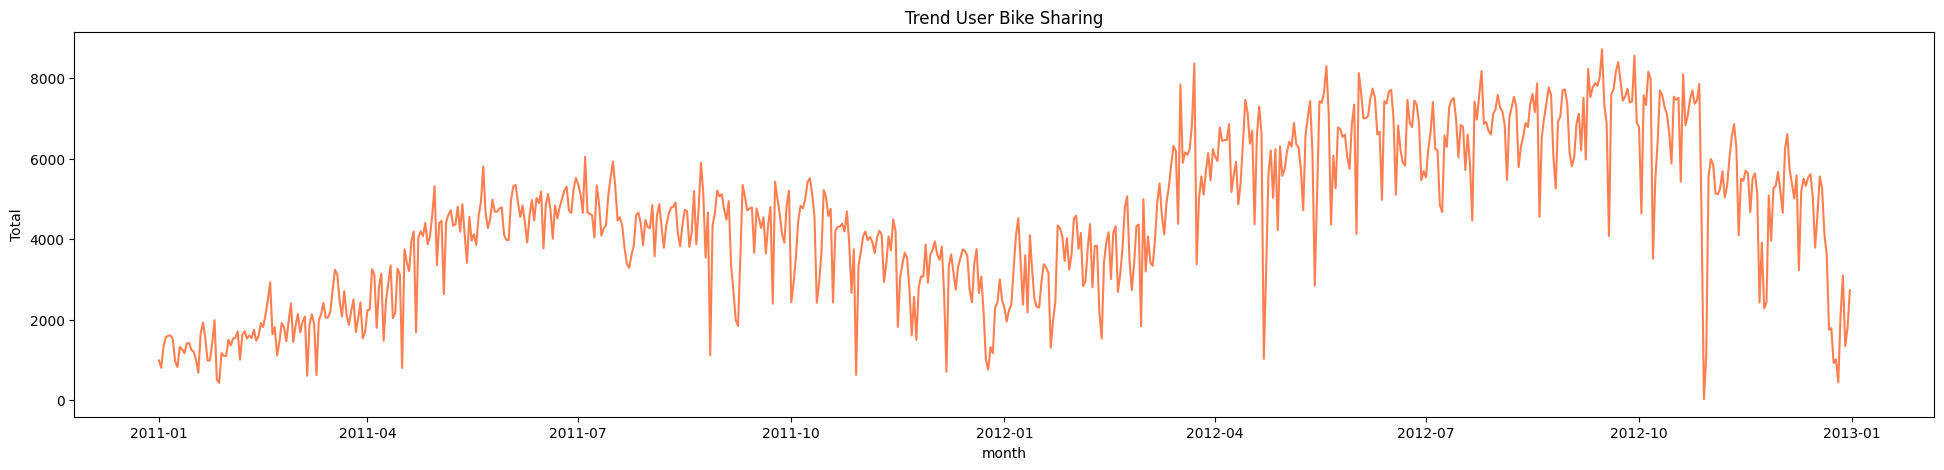

In [39]:
plt.figure(figsize=(24, 5))
monthly_user = day_df["total_user"].groupby(day_df["datetime"]).max()
plt.plot(monthly_user.index, monthly_user.values, c="#FF7F50")
plt.xlabel("month")
plt.ylabel("Total")
plt.title("Trend User Bike Sharing")
plt.show()

### Pertanyaan 2: Bagaimana musim dan cuaca mempengaruhi user menggunakan Bike Sharing?

Distribusi season

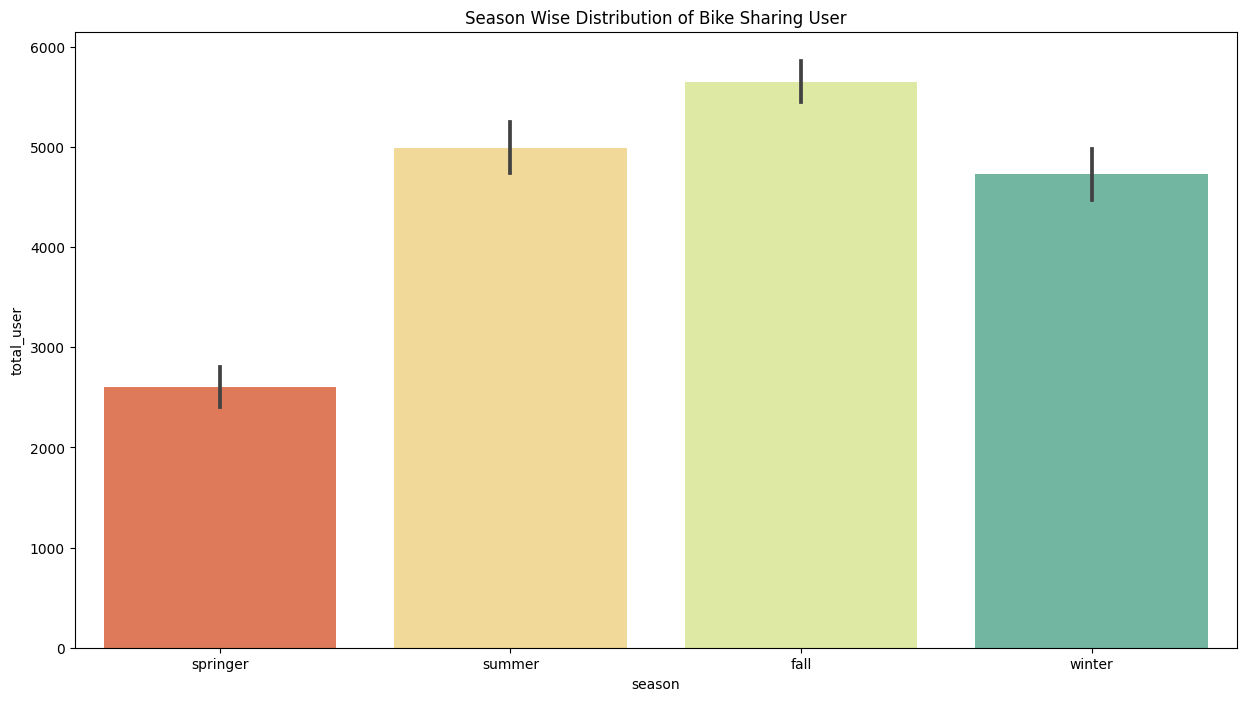

In [40]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="season",y="total_user",data=day_df.sort_values(by="season", ascending=False), ax=ax, palette="Spectral")
ax.set_title("Season Wise Distribution of Bike Sharing User")
plt.show()

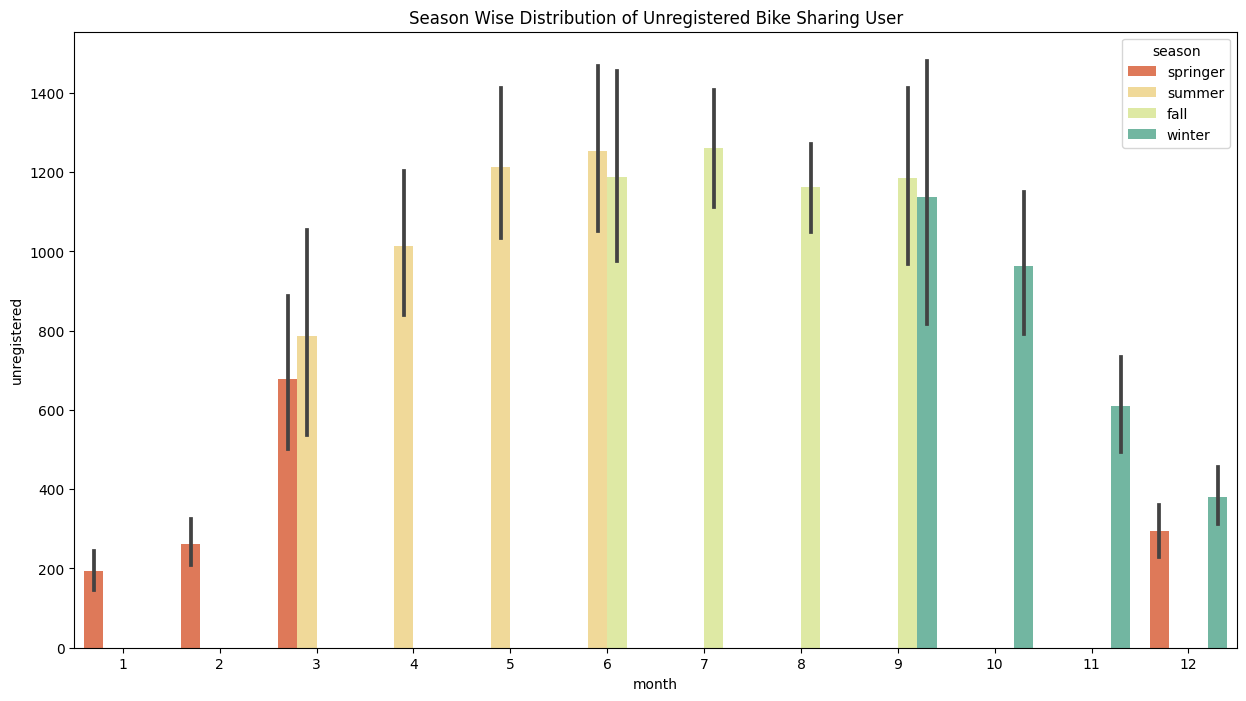

In [41]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="month",y="unregistered",data=day_df[["month","unregistered","season"]],hue="season",ax=ax2, palette="Spectral")
ax2.set_title("Season Wise Distribution of Unregistered Bike Sharing User")
plt.show()

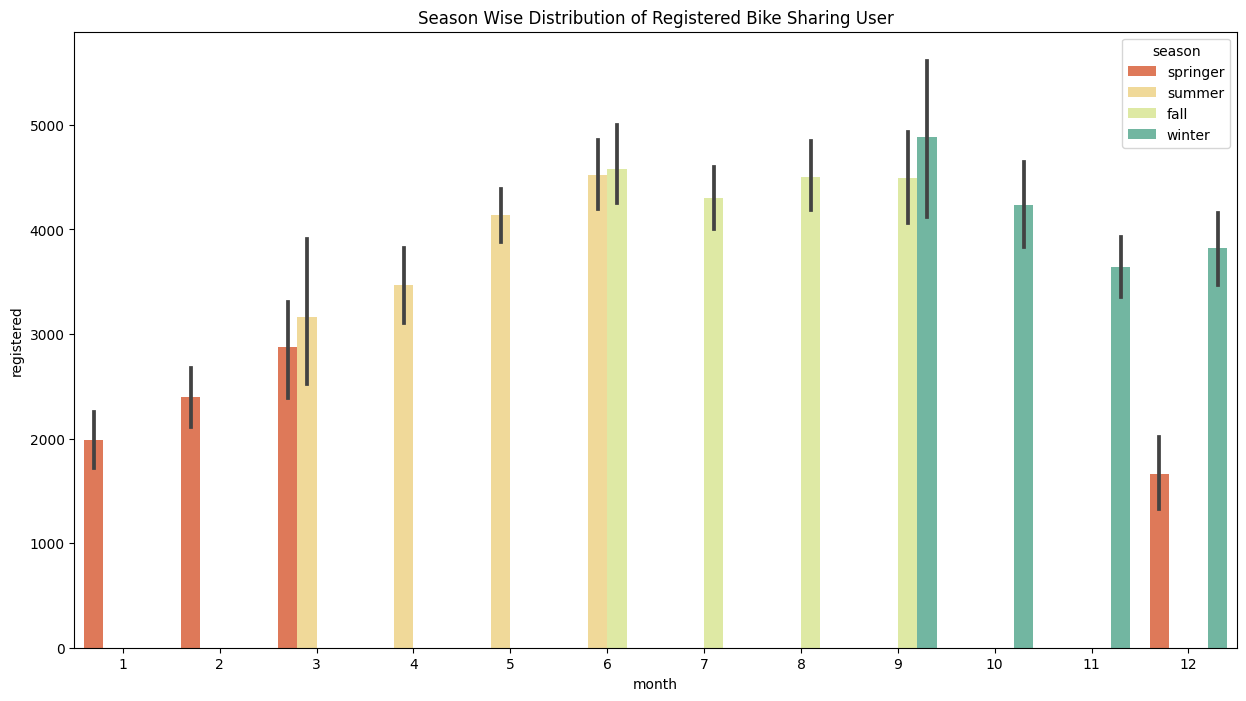

In [42]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="month",y="registered",data=day_df[["month","registered","season"]],hue="season",ax=ax2, palette="Spectral")
ax2.set_title("Season Wise Distribution of Registered Bike Sharing User")
plt.show()

Distribusi weather condition

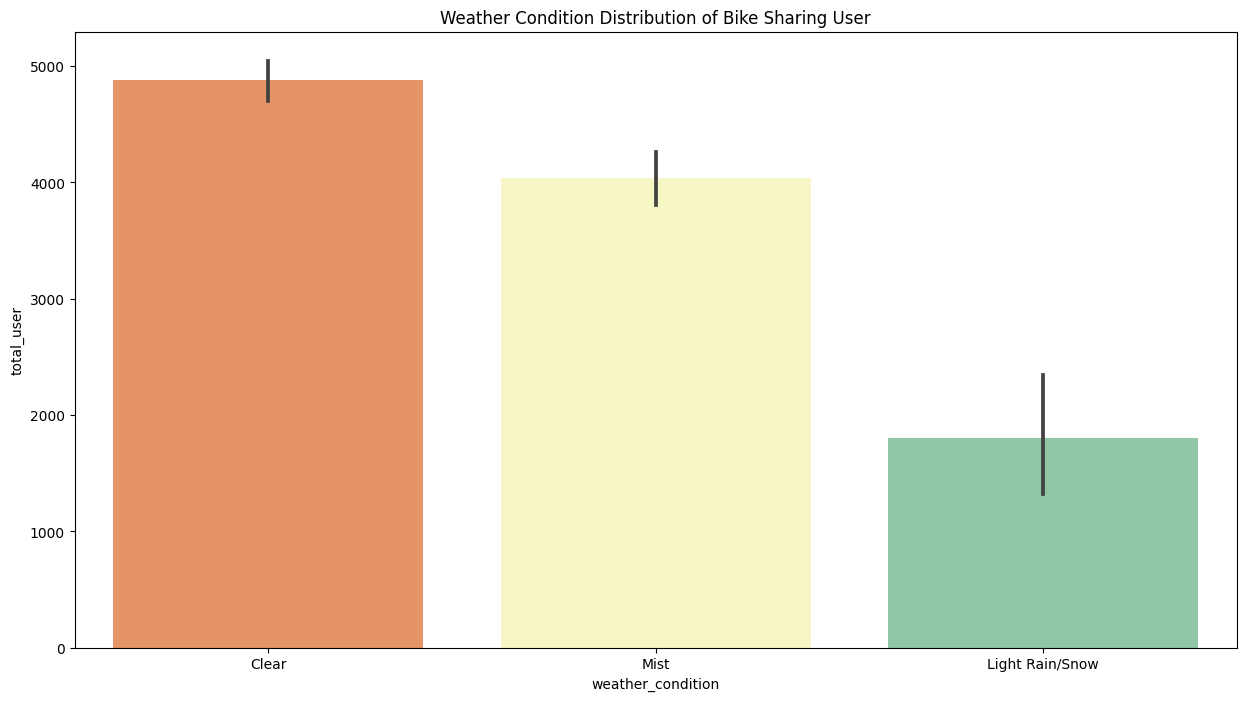

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="weather_condition",y="total_user",data=day_df.sort_values(by="weather_condition", ascending=False), ax=ax, palette="Spectral")
ax.set_title("Weather Condition Distribution of Bike Sharing User")
plt.show()

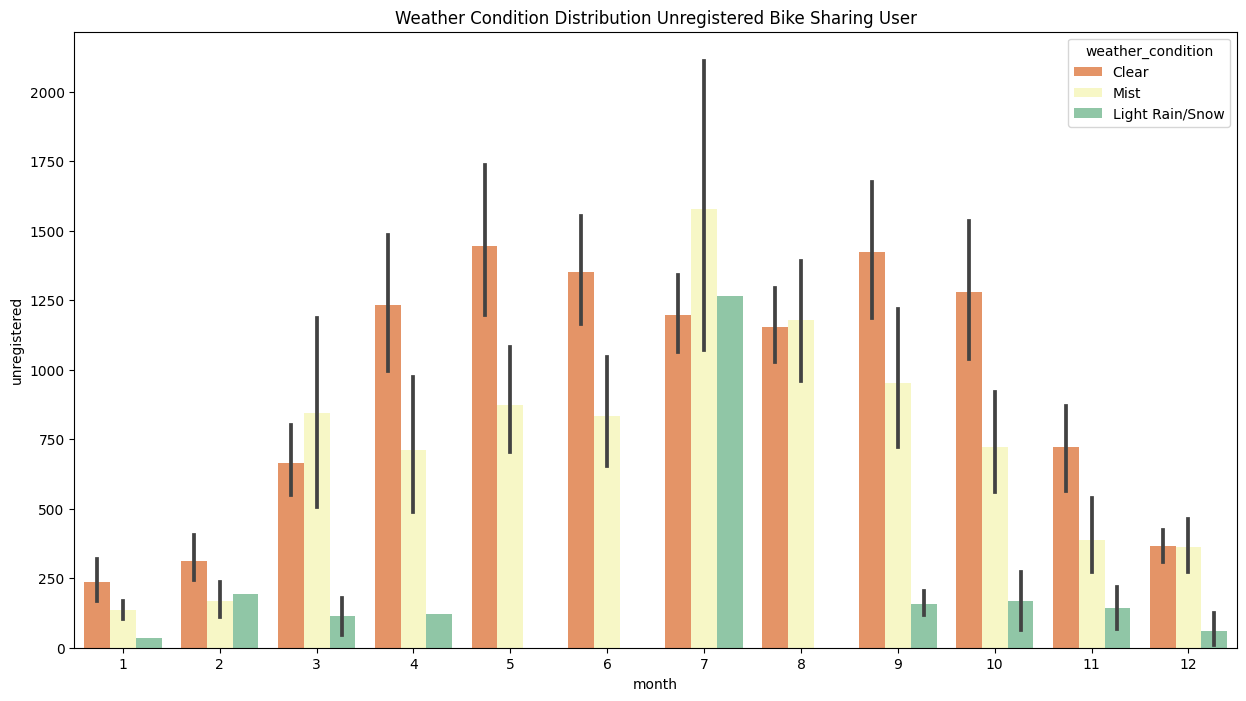

In [44]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="month",y="unregistered",data=day_df[["month","unregistered","weather_condition"]],hue="weather_condition",ax=ax2, palette="Spectral")
ax2.set_title("Weather Condition Distribution Unregistered Bike Sharing User")
plt.show()

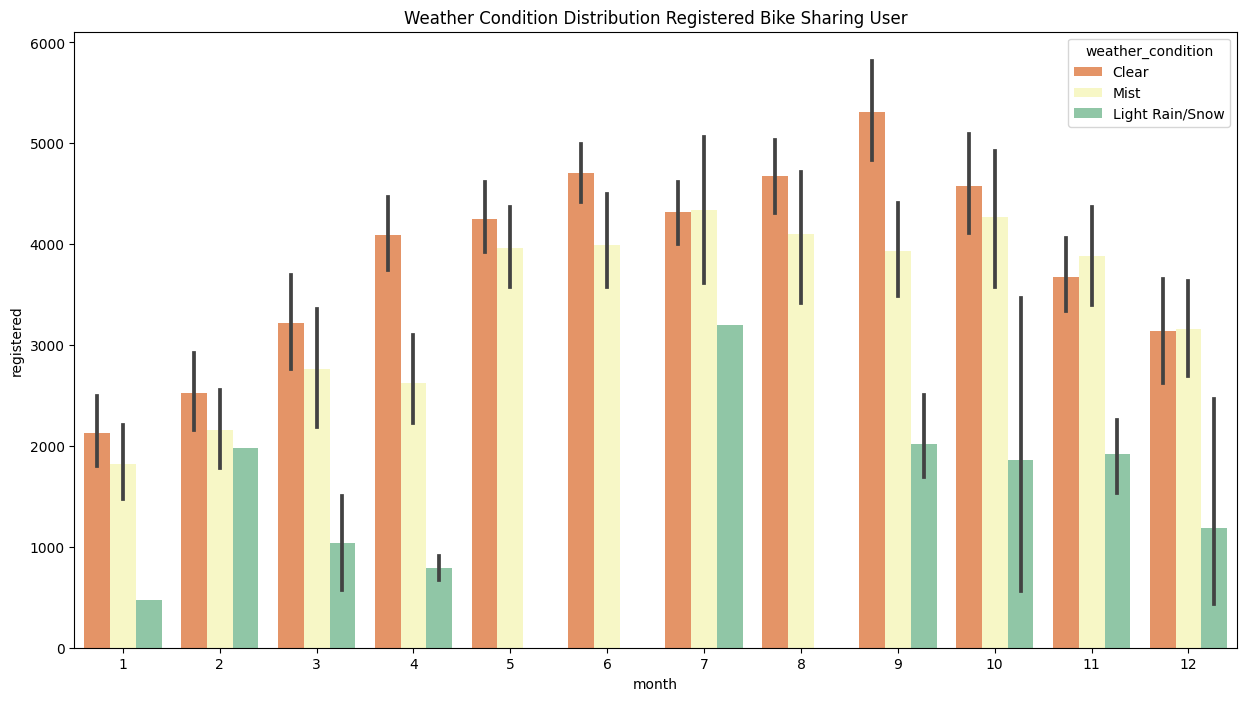

In [45]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="month",y="registered",data=day_df[["month","registered","weather_condition"]],hue="weather_condition",ax=ax2, palette="Spectral")
ax2.set_title("Weather Condition Distribution Registered Bike Sharing User")
plt.show()

### Pertanyaan 3: Di hari (weekday/holiday/workingdays) apa user cenderung menggunakan Bike Sharing?

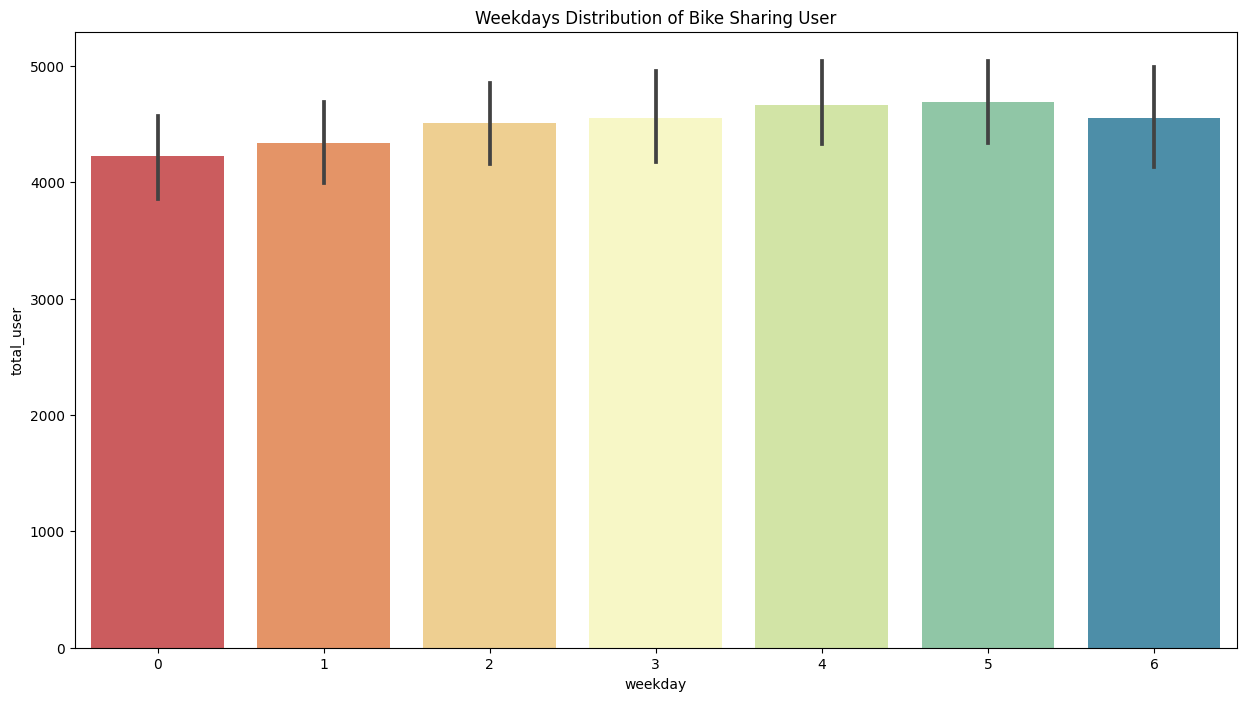

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="weekday",y="total_user",data=day_df.sort_values(by="weekday", ascending=False), ax=ax, palette="Spectral")
ax.set_title("Weekdays Distribution of Bike Sharing User")
plt.show()

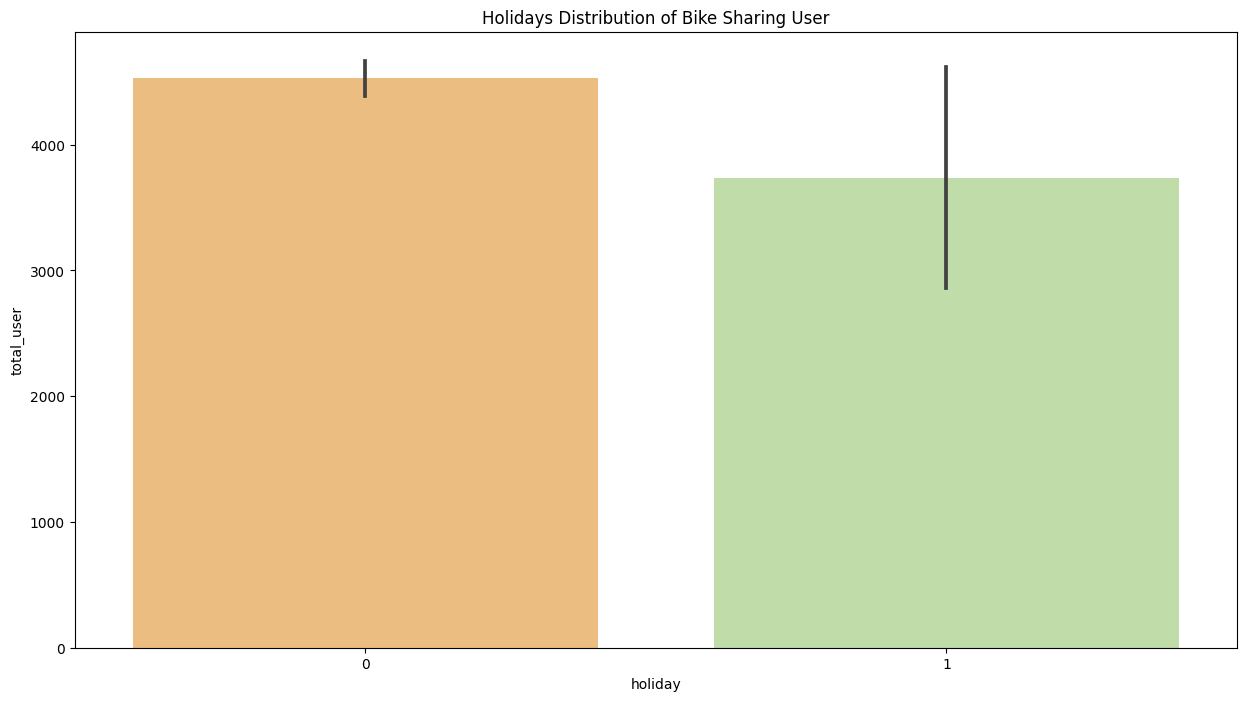

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="holiday",y="total_user",data=day_df.sort_values(by="holiday", ascending=False), ax=ax, palette="Spectral")
ax.set_title('Holidays Distribution of Bike Sharing User')
plt.show()

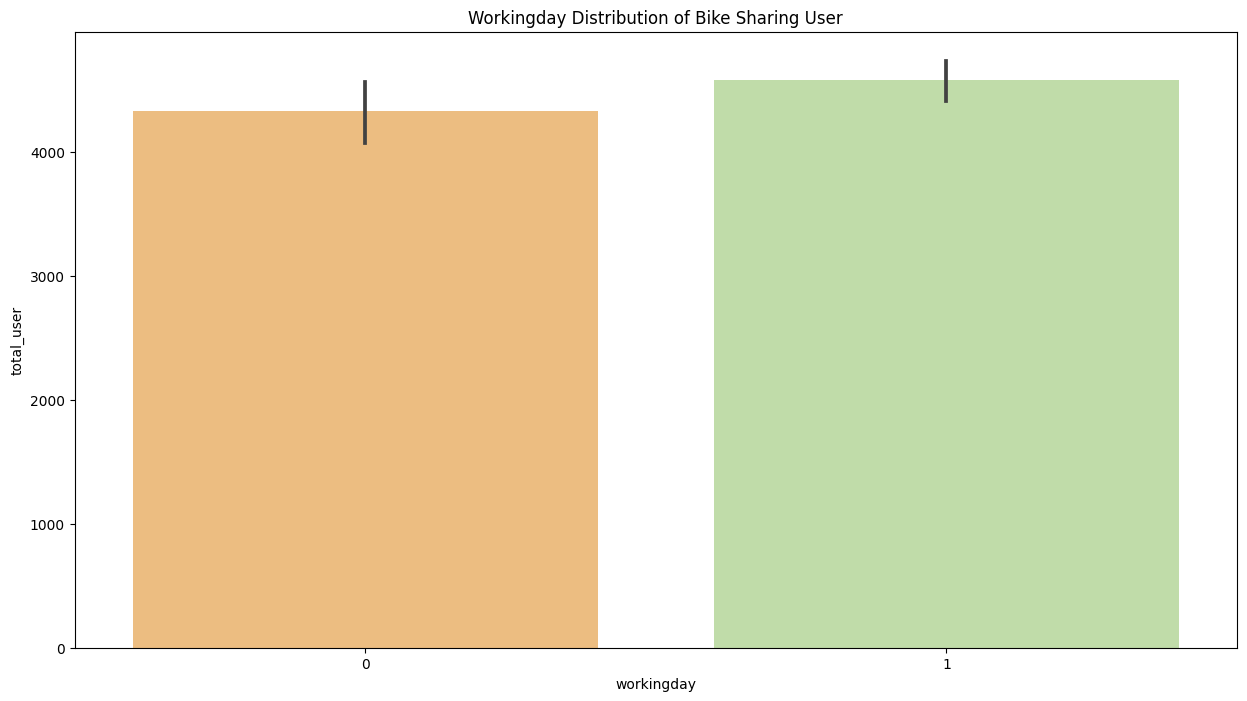

In [48]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x="workingday",y="total_user",data=day_df.sort_values(by="workingday", ascending=False), ax=ax, palette="Spectral")
ax.set_title("Workingday Distribution of Bike Sharing User")
plt.show()

### Pertanyaan 4: Pada pukul berapa user cenderung menggunakan Bike Sharing?

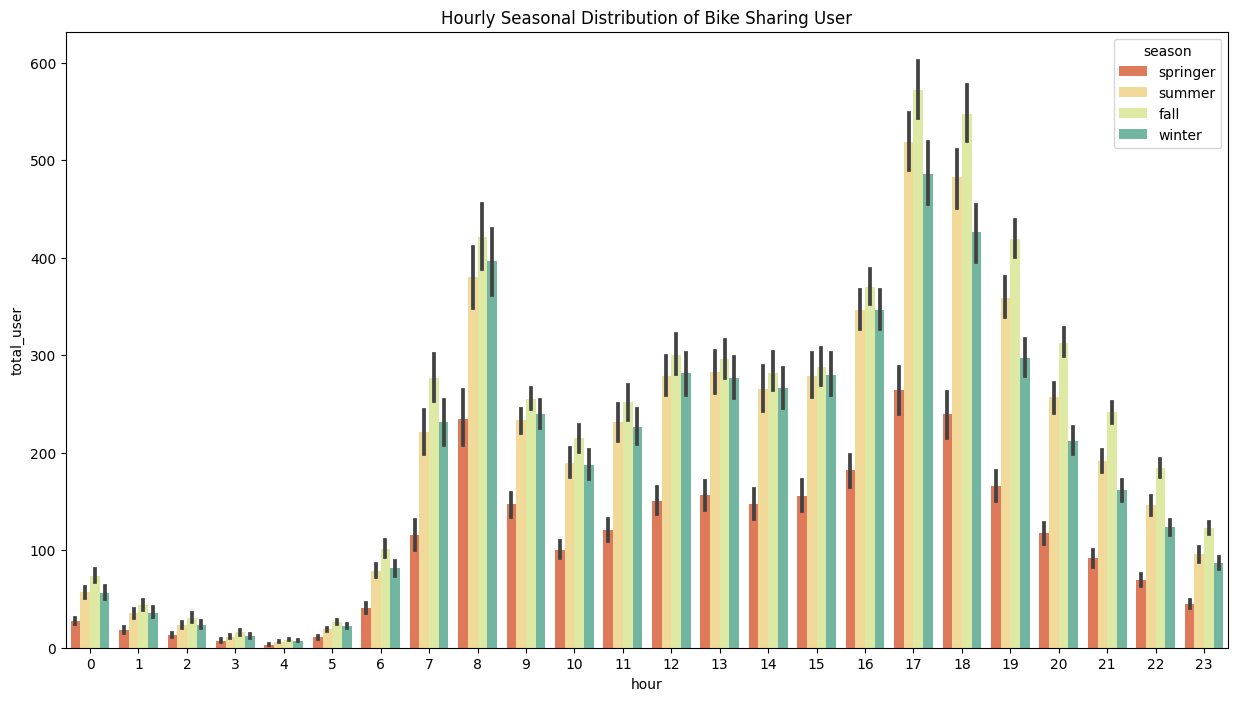

In [49]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="hour",y="total_user",data=hour_df[["hour","total_user","season"]],hue="season",ax=ax2, palette="Spectral")
ax2.set_title("Hourly Seasonal Distribution of Bike Sharing User")
plt.show()

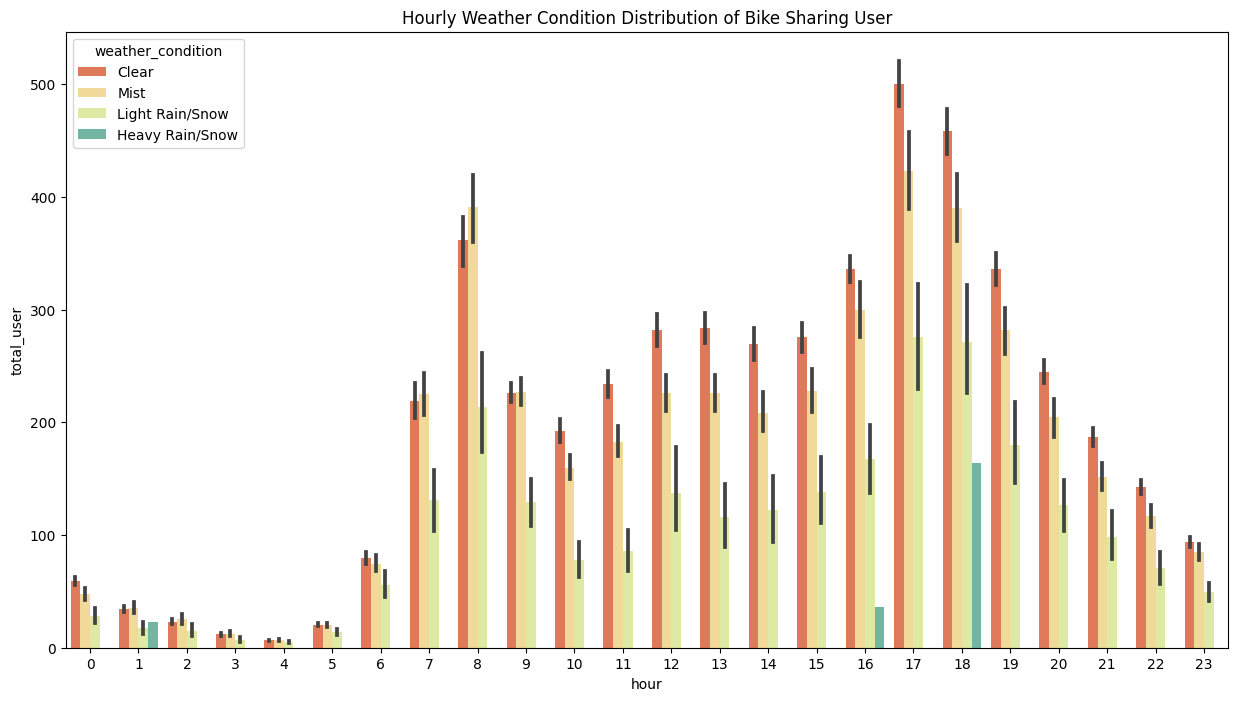

In [50]:
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x="hour",y="total_user",data=hour_df[["hour","total_user","weather_condition"]],hue="weather_condition",ax=ax2, palette="Spectral")
ax2.set_title("Hourly Weather Condition Distribution of Bike Sharing User")
plt.show()

In [56]:
current_date = max(hour_df["datetime"])
rfm_df = hour_df.groupby("registered").agg({
    "datetime" : lambda x: (current_date - x.max()).days,
    "rec_id" : 'count',
    "total_user" : 'sum'
}).reset_index()

rfm_df.colums = ["registered", "recency", "frequency", "monetary"]

rfm_df.head()

<ipython-input-56-9bf79d74642f>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rfm_df.colums = ["registered", "recency", "frequency", "monetary"]


,registered,datetime,rec_id,total_user
0,0,17.0,24,35
1,1,15.0,201,294
2,2,19.0,245,648
3,3,14.0,294,1154
4,4,106.0,307,1602


## Conclusion

- Conclution pertanyaan 1: Berapa jumlah user Bike Sharing tahun 2011-2012?
Berdasarkan Exploratory data serta visualiasi data, di dapatkan jumlah pengguna Bike Sharing sebesar 1.243.103 dan 2.049.576 pada tahun 2011 dan 2012. Tipe User juga dibedakan berdasarkan user ter-registrasi dan non-registrasi. Pada tahun 2011 jumlah User non-registered sebesar 247.252 dan 372.765. Sedangkan pada tahun 2012 sebanyak 995.851 dan 1.676.811. Dari jumlah user mengalami peningkatan pada tahun 2012. Kemudian komposisi user ter-registrasi yang lebih dominan dapat mengindikasikan mereka secara frequenly menggunakan Bike Sharing, sehingga pihak Bike Sharing dapat membuat retention plan dan aqusition user.

- conclution pertanyaan 2: Bagaimana musim dan cuaca mempengaruhi user menggunakan Bike Sharing?
Dari hasil Exploratory data, didapatkan bahwa tingkat aktivitas renting di Bike Sharing pada musin gugur(fall) adalah yang tertinggi, kemudian diikuti oleh summer, winter, dan spring. Sedangkan berdasarkan cuaca tingkat renting terjadi ketika cuaca sedang clear(cerah berawan).

- conclution pertanyaan 3: Di hari (weekday/holiday/workingdays) apa user cenderung menggunakan Bike Sharing? Pada hari ke 5 (sabtu), 4 (jumat), dan 6 (minggu) merupakan hari dengan jumlah renting terbanyak. Dan pada hari holidays terjadi lebih banyak aktivitas daripada hari bukan holiday. Dari begitupula pada workingday.

- conclution pertanyaan 4: Pada pukul berapa user cenderung menggunakan Bike Sharing? Aktivitas renting terbanyak dalam 24 jam terjadi pada pukul 18, 16, dan 8.

In [52]:
all_df.to_csv("all_data.csv", index=False)

In [53]:
hour_df.to_csv("hour_cleaned.csv", index=False)

In [54]:
day_df.to_csv("day_cleaned.csv", index=False)